Задание 89. Реализовать параллельное вычисление собственного интеграла методом Симпсона. Прежде всего, была написана программа и протестирована с разными данными: разным количеством сегментов интегрирования и разным числом нитей. Все они изменялись с шагом в 2 раза.

Рассмотрим сперва зависимость времени работы программы от числа сегментов для случайного (из посчитанных) числа нитей. Пусть для 8.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [7]:
# первый тест. Число сегментов достаточно велико для каждого из случаев, паоэтому результаты одинаковые
# но если его уменьшить, точность, соответственно, снизится
data_0 = [( 1,  262144,  0.326717,  39.8671121783),
( 1,  524288,  0.638496,  39.8671121783),
( 1,  1048576,  1.277864,  39.8671121783),
( 1,  2097152,  2.558085,  39.8671121783),
( 1,  4194304,  5.110295,  39.8671121783),
( 1,  8388608,  10.262784,  39.8671121783),
( 1,  16777216,  20.534931,  39.8671121783),
( 1,  33554432,  41.062169,  39.8671121783),
( 1,  67108864,  82.160681,  39.8671121783),
( 1,  134217728,  164.443755,  39.8671121783),
( 2,  262144,  0.169688,  39.8671121783),
( 2,  524288,  0.324561,  39.8671121783),
( 2,  1048576,  0.649458,  39.8671121783),
( 2,  2097152,  1.298188,  39.8671121783),
( 2,  4194304,  2.595157,  39.8671121783),
( 2,  8388608,  5.190417,  39.8671121783),
( 2,  16777216,  10.380563,  39.8671121783),
( 2,  33554432,  20.769113,  39.8671121783),
( 2,  67108864,  41.561316,  39.8671121783),
( 2,  134217728,  83.120461,  39.8671121783),
( 4,  262144,  0.091260,  39.8671121783),
( 4,  524288,  0.167370,  39.8671121783),
( 4,  1048576,  0.334726,  39.8671121783),
( 4,  2097152,  0.669468,  39.8671121783),
( 4,  4194304,  1.338318,  39.8671121783),
( 4,  8388608,  2.676453,  39.8671121783),
( 4,  16777216,  5.354530,  39.8671121783),
( 4,  33554432,  10.708610,  39.8671121783),
( 4,  67108864,  21.434935,  39.8671121783),
( 4,  134217728,  42.880889,  39.8671121783),
( 8,  262144,  0.051351,  39.8671121783),
( 8,  524288,  0.087166,  39.8671121783),
( 8,  1048576,  0.174437,  39.8671121783),
( 8,  2097152,  0.349201,  39.8671121783),
( 8,  4194304,  0.699979,  39.8671121783),
( 8,  8388608,  1.400667,  39.8671121783),
( 8,  16777216,  2.795950,  39.8671121783),
( 8,  33554432,  5.579524,  39.8671121783),
( 8,  67108864,  11.176195,  39.8671121783),
( 8,  134217728,  22.401570,  39.8671121783),
( 16,  262144,  0.036338,  39.8671121783),
( 16,  524288,  0.056980,  39.8671121783),
( 16,  1048576,  0.114051,  39.8671121783),
( 16,  2097152,  0.228012,  39.8671121783),
( 16,  4194304,  0.456690,  39.8671121783),
( 16,  8388608,  0.913063,  39.8671121783),
( 16,  16777216,  1.825885,  39.8671121783),
( 16,  33554432,  3.652368,  39.8671121783),
( 16,  67108864,  7.299220,  39.8671121783),
( 16,  134217728,  14.541861,  39.8671121783),
( 32,  262144,  0.030746,  39.8671121783),
( 32,  524288,  0.043892,  39.8671121783),
( 32,  1048576,  0.087784,  39.8671121783),
( 32,  2097152,  0.175628,  39.8671121783),
( 32,  4194304,  0.351090,  39.8671121783),
( 32,  8388608,  0.702509,  39.8671121783),
( 32,  16777216,  1.404842,  39.8671121783),
( 32,  33554432,  2.808867,  39.8671121783),
( 32,  67108864,  5.617579,  39.8671121783),
( 32,  134217728,  11.236339,  39.8671121783),
( 64,  262144,  0.034532,  39.8671121783),
( 64,  524288,  0.036859,  39.8671121783),
( 64,  1048576,  0.074014,  39.8671121783),
( 64,  2097152,  0.147380,  39.8671121783),
( 64,  4194304,  0.294715,  39.8671121783),
( 64,  8388608,  0.589676,  39.8671121783),
( 64,  16777216,  1.179477,  39.8671121783),
( 64,  33554432,  2.359704,  39.8671121783),
( 64,  67108864,  4.721817,  39.8671121783),
( 64,  134217728,  9.455864,  39.8671121783),
( 128,  262144,  0.062436,  39.8671121783),
( 128,  524288,  0.043370,  39.8671121783),
( 128,  1048576,  0.089055,  39.8671121783),
( 128,  2097152,  0.173665,  39.8671121783),
( 128,  4194304,  0.357759,  39.8671121783),
( 128,  8388608,  0.694738,  39.8671121783),
( 128,  16777216,  1.409338,  39.8671121783),
( 128,  33554432,  2.795229,  39.8671121783),
( 128,  67108864,  5.550434,  39.8671121783),
( 128,  134217728,  11.157445,  39.8671121783),
( 160,  262144,  0.107514,  39.8671121783),
( 160,  524288,  0.031971,  39.8671121783),
( 160,  1048576,  0.062836,  39.8671121783),
( 160,  2097152,  0.124783,  39.8671121783),
( 160,  4194304,  0.250452,  39.8671121783),
( 160,  8388608,  0.507344,  39.8671121783),
( 160,  16777216,  1.008301,  39.8671121783),
( 160,  33554432,  2.049299,  39.8671121783),
( 160,  67108864,  4.126998,  39.8671121783),
( 160,  134217728,  8.106064,  39.8671121783),


]

([<matplotlib.axis.YTick at 0x7fc8a093d650>,
 [Text(0, 0, '0.051351'),
  Text(0, 0, '0.087166'),
  Text(0, 0, '0.174437'),
  Text(0, 0, '0.349201'),
  Text(0, 0, '0.699979'),
  Text(0, 0, '1.400667'),
  Text(0, 0, '2.79595'),
  Text(0, 0, '5.579524'),
  Text(0, 0, '11.176195'),
  Text(0, 0, '22.40157')])

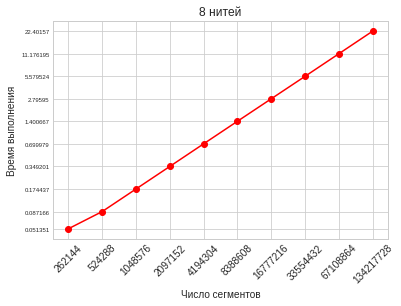

In [28]:
fig, ax = plt.subplots()
N = 8
X = np.array([test[1] for test in data_0 if test[0] == N])
Y = np.array([test[2] for test in data_0 if test[0] == N])
ax.plot(X, Y, color='red', marker='o')
ax.set_xlabel("Число сегментов")
ax.set_ylabel("Время выполнения")
ax.set_title(str(N) + " нитей")
ax.set_yscale("log")
ax.set_xscale("log")
plt.xticks(X, X, rotation=45)
plt.yticks(Y,Y, fontsize=6)

Как видно, зависимость похожа на линейную, что логично. Особенно при увеличении числа сегментов. Там влияние чего-либо кроме вычислений интеграла значительно снижается. Добавим на график еще и прямую линию, соединяющую последние 2 измерения

([<matplotlib.axis.YTick at 0x7fc8a06ba190>,
 [Text(0, 0, '0.051351'),
  Text(0, 0, '0.087166'),
  Text(0, 0, '0.174437'),
  Text(0, 0, '0.349201'),
  Text(0, 0, '0.699979'),
  Text(0, 0, '1.400667'),
  Text(0, 0, '2.79595'),
  Text(0, 0, '5.579524'),
  Text(0, 0, '11.176195'),
  Text(0, 0, '22.40157')])

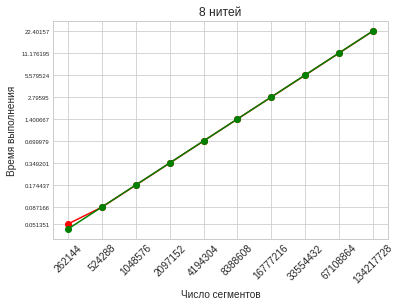

In [27]:
fig, ax = plt.subplots()
N = 8
X = np.array([test[1] for test in data_0 if test[0] == N])
Y = np.array([test[2] for test in data_0 if test[0] == N])
ax.plot(X, Y, color='red', marker='o')
ax.set_xlabel("Число сегментов")
ax.set_ylabel("Время выполнения")
ax.set_title(str(N) + " нитей")
ax.set_yscale("log")
ax.set_xscale("log")
Y_lin = np.array([test[1] * (Y[-1] - Y[-2]) / (X[-1] - X[-2]) for test in data_0 if test[0] == N])
ax.plot(X, Y_lin, color='green', marker='o')
plt.xticks(X, X, rotation=45)
plt.yticks(Y,Y, fontsize=6)

Графики почти совпадают. Только для самого маленького числа нитей накладные расходы достаточно велики, чтобы зависимость заметно отличалась от линейной. Поэтому далее в некоторых случаях будем рассматривать только максимальное число сегментов

Теперь посторим диаграмму зависимости времени выполнения от числа нитей для максимально протестированного числа сегментов

 Линейная зависимость: [41.062169   20.5310845  10.26554225  5.13277112  2.56638556  1.28319278
  0.64159639  0.3207982   0.25663856]
Реальные результаты: [41.062169 20.769113 10.70861   5.579524  3.652368  2.808867  2.359704
  2.795229  2.049299]


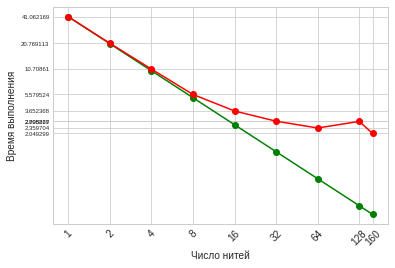

In [29]:
fig, ax = plt.subplots()
Seg_Num = max([test[1] for test in data_0])
X = np.array([test[0] for test in data_0 if test[1] == Seg_Num])
Y = np.array([test[2] for test in data_0 if test[1] == Seg_Num])
Y_lin =np.array([Y[0] * (X[0] / X[i]) for i in range(len(X))])
ax.set_yscale("log")
ax.set_xscale("log")
print(" Линейная зависимость:", Y_lin)
print("Реальные результаты:", Y)
ax.plot(X, Y_lin, color='green', marker='o')
ax.plot(X, Y, color='red', marker='o')
ax.set_xlabel("Число нитей")
ax.set_ylabel("Время выполнения")

plt.xticks(X, X, rotation=45)
plt.yticks(Y,Y, fontsize=6)
fig.savefig('./max_threads.png')


Как видно, на количестве нитей 1-8, зависимость числа нитей от времени работы почти линейная. То есть с увеличением числа нитей в 2 раза, время работы падает в 2 раза. На числе нитей 16-64 наблюдается улучшение скорости работы, но уже не линейное. 128 нитей дают худший результат, чем 64, а 160 нитей дают лучший результат. Значит, оптимальне число нитей надо искать около 64 или ближе к максимуму, около 160.

In [30]:
data_1 = [( 50,  262144,  0.029690,  39.8671121783),
( 50,  524288,  0.038983,  39.8671121783),
( 50,  1048576,  0.077970,  39.8671121783),
( 50,  2097152,  0.155816,  39.8671121783),
( 50,  4194304,  0.311846,  39.8671121783),
( 50,  8388608,  0.623366,  39.8671121783),
( 50,  16777216,  1.246316,  39.8671121783),
( 50,  33554432,  2.518838,  39.8671121783),
( 50,  67108864,  4.985097,  39.8671121783),
( 50,  134217728,  9.974512,  39.8671121783),
( 60,  262144,  0.029591,  39.8671121783),
( 60,  524288,  0.036639,  39.8671121783),
( 60,  1048576,  0.068505,  39.8671121783),
( 60,  2097152,  0.136902,  39.8671121783),
( 60,  4194304,  0.273911,  39.8671121783),
( 60,  8388608,  0.548329,  39.8671121783),
( 60,  16777216,  1.096083,  39.8671121783),
( 60,  33554432,  2.191243,  39.8671121783),
( 60,  67108864,  4.381141,  39.8671121783),
( 60,  134217728,  8.758917,  39.8671121783),
( 70,  262144,  0.028450,  39.8671121783),
( 70,  524288,  0.034055,  39.8671121783),
( 70,  1048576,  0.067929,  39.8671121783),
( 70,  2097152,  0.135803,  39.8671121783),
( 70,  4194304,  0.271452,  39.8671121783),
( 70,  8388608,  0.543478,  39.8671121783),
( 70,  16777216,  1.085990,  39.8671121783),
( 70,  33554432,  2.171687,  39.8671121783),
( 70,  67108864,  4.342919,  39.8671121783),
( 70,  134217728,  8.685751,  39.8671121783),
( 80,  262144,  0.027654,  39.8671121783),
( 80,  524288,  0.031484,  39.8671121783),
( 80,  1048576,  0.062040,  39.8671121783),
( 80,  2097152,  0.123622,  39.8671121783),
( 80,  4194304,  0.247278,  39.8671121783),
( 80,  8388608,  0.494425,  39.8671121783),
( 80,  16777216,  0.988876,  39.8671121783),
( 80,  33554432,  1.978510,  39.8671121783),
( 80,  67108864,  3.955902,  39.8671121783),
( 80,  134217728,  7.911623,  39.8671121783),
( 90,  262144,  0.048908,  39.8671121783),
( 90,  524288,  0.082077,  39.8671121783),
( 90,  1048576,  0.145686,  39.8671121783),
( 90,  2097152,  0.283258,  39.8671121783),
( 90,  4194304,  0.560622,  39.8671121783),
( 90,  8388608,  1.121782,  39.8671121783),
( 90,  16777216,  2.283789,  39.8671121783),
( 90,  33554432,  4.584017,  39.8671121783),
( 90,  67108864,  9.223780,  39.8671121783),
( 90,  134217728,  18.389584,  39.8671121783),
( 100,  262144,  0.044999,  39.8671121783),
( 100,  524288,  0.067634,  39.8671121783),
( 100,  1048576,  0.136307,  39.8671121783),
( 100,  2097152,  0.246017,  39.8671121783),
( 100,  4194304,  0.481323,  39.8671121783),
( 100,  8388608,  0.961822,  39.8671121783),
( 100,  16777216,  1.941774,  39.8671121783),
( 100,  33554432,  3.920200,  39.8671121783),
( 100,  67108864,  7.780633,  39.8671121783),
( 100,  134217728,  15.607052,  39.8671121783),
( 110,  262144,  0.047125,  39.8671121783),
( 110,  524288,  0.057168,  39.8671121783),
( 110,  1048576,  0.122732,  39.8671121783),
( 110,  2097152,  0.216955,  39.8671121783),
( 110,  4194304,  0.595498,  39.8671121783),
( 110,  8388608,  0.858585,  39.8671121783),
( 110,  16777216,  1.726392,  39.8671121783),
( 110,  33554432,  3.438626,  39.8671121783),
( 110,  67108864,  6.943479,  39.8671121783),
( 110,  134217728,  13.829948,  39.8671121783),
( 120,  262144,  0.056958,  39.8671121783),
( 120,  524288,  0.046969,  39.8671121783),
( 120,  1048576,  0.094765,  39.8671121783),
( 120,  2097152,  0.187377,  39.8671121783),
( 120,  4194304,  0.374148,  39.8671121783),
( 120,  8388608,  0.749125,  39.8671121783),
( 120,  16777216,  1.502164,  39.8671121783),
( 120,  33554432,  3.013492,  39.8671121783),
( 120,  67108864,  6.100021,  39.8671121783),
( 120,  134217728,  12.107899,  39.8671121783),
( 130,  262144,  0.047081,  39.8671121783),
( 130,  524288,  0.040930,  39.8671121783),
( 130,  1048576,  0.081800,  39.8671121783),
( 130,  2097152,  0.163671,  39.8671121783),
( 130,  4194304,  0.327570,  39.8671121783),
( 130,  8388608,  0.654147,  39.8671121783),
( 130,  16777216,  1.315723,  39.8671121783),
( 130,  33554432,  2.648745,  39.8671121783),
( 130,  67108864,  5.352170,  39.8671121783),
( 130,  134217728,  10.564021,  39.8671121783),
( 140,  262144,  0.041001,  39.8671121783),
( 140,  524288,  0.035672,  39.8671121783),
( 140,  1048576,  0.070542,  39.8671121783),
( 140,  2097152,  0.140624,  39.8671121783),
( 140,  4194304,  0.281926,  39.8671121783),
( 140,  8388608,  0.563139,  39.8671121783),
( 140,  16777216,  1.133167,  39.8671121783),
( 140,  33554432,  2.254696,  39.8671121783),
( 140,  67108864,  4.559858,  39.8671121783),
( 140,  134217728,  9.125091,  39.8671121783),
( 150,  262144,  0.051063,  39.8671121783),
( 150,  524288,  0.034296,  39.8671121783),
( 150,  1048576,  0.068012,  39.8671121783),
( 150,  2097152,  0.141550,  39.8671121783),
( 150,  4194304,  0.271883,  39.8671121783),
( 150,  8388608,  0.562843,  39.8671121783),
( 150,  16777216,  1.093292,  39.8671121783),
( 150,  33554432,  2.239733,  39.8671121783),
( 150,  67108864,  4.416732,  39.8671121783),
( 150,  134217728,  8.885565,  39.8671121783),
( 160,  262144,  0.049602,  39.8671121783),
( 160,  524288,  0.030846,  39.8671121783),
( 160,  1048576,  0.062134,  39.8671121783),
( 160,  2097152,  0.123005,  39.8671121783),
( 160,  4194304,  0.245429,  39.8671121783),
( 160,  8388608,  0.498711,  39.8671121783),
( 160,  16777216,  1.003778,  39.8671121783),
( 160,  33554432,  2.068207,  39.8671121783),
( 160,  67108864,  4.013577,  39.8671121783),
( 160,  134217728,  7.994151,  39.8671121783),
]

 Линейная зависимость: [1.246316   1.03859667 0.89022571 0.7789475  0.69239778 0.623158
 0.56650727 0.51929833 0.47935231 0.44511286 0.41543867 0.38947375]
Реальные результаты: [1.246316 1.096083 1.08599  0.988876 2.283789 1.941774 1.726392 1.502164
 1.315723 1.133167 1.093292 1.003778]


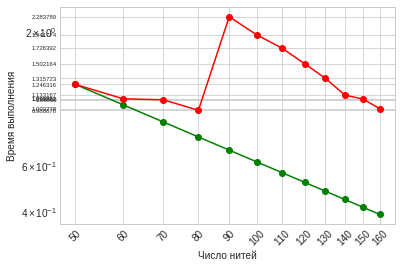

In [37]:
fig, ax = plt.subplots()
Seg_Num = max([test[1] for test in data_1])
X = np.array([test[0] for test in data_1 if test[1] == Seg_Num])
Y = np.array([test[2] for test in data_1 if test[1] == Seg_Num])
Y_lin =np.array([Y[0] * (X[0] / X[i]) for i in range(len(X))])
ax.set_yscale("log")
ax.set_xscale("log")
print(" Линейная зависимость:", Y_lin)
print("Реальные результаты:", Y)
ax.plot(X, Y_lin, color='green', marker='o')
ax.plot(X, Y, color='red', marker='o')
ax.set_xlabel("Число нитей")
ax.set_ylabel("Время выполнения")

plt.xticks(X, X, rotation=45)
plt.yticks(Y,Y, fontsize=6)
fig.savefig('./max_threads.png')

In [48]:
data_0 = sorted(data_0 + data_1, key=lambda x: x[0])

 Линейная зависимость: [164.443755    82.2218775   41.11093875  20.55546938  10.27773469
   5.13886734   3.2888751    3.2888751    2.74072925   2.74072925
   2.56943367   2.3491965    2.3491965    2.05554694   2.05554694
   1.82715283   1.82715283   1.64443755   1.64443755   1.49494323
   1.49494323   1.37036463   1.37036463   1.28471684   1.26495196
   1.26495196   1.17459825   1.17459825   1.0962917    1.0962917
   1.02777347   1.02777347   1.02777347]
Реальные результаты: [164.443755  83.120461  42.880889  22.40157   14.541861  11.236339
   9.974512   9.974512   8.758917   8.758917   9.455864   8.685751
   8.685751   7.911623   7.911623  18.389584  18.389584  15.607052
  15.607052  13.829948  13.829948  12.107899  12.107899  11.157445
  10.564021  10.564021   9.125091   9.125091   8.885565   8.885565
   8.106064   7.994151   7.994151]


([<matplotlib.axis.XTick at 0x7fc8a0999a90>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '4'),
  Text(0, 0, '8'),
  Text(0, 0, '16'),
  Text(0, 0, '32'),
  Text(0, 0, '50'),
  Text(0, 0, '50'),
  Text(0, 0, '60'),
  Text(0, 0, '60'),
  Text(0, 0, '64'),
  Text(0, 0, '70'),
  Text(0, 0, '70'),
  Text(0, 0, '80'),
  Text(0, 0, '80'),
  Text(0, 0, '90'),
  Text(0, 0, '90'),
  Text(0, 0, '100'),
  Text(0, 0, '100'),
  Text(0, 0, '110'),
  Text(0, 0, '110'),
  Text(0, 0, '120'),
  Text(0, 0, '120'),
  Text(0, 0, '128'),
  Text(0, 0, '130'),
  Text(0, 0, '130'),
  Text(0, 0, '140'),
  Text(0, 0, '140'),
  Text(0, 0, '150'),
  Text(0, 0, '150'),
  Text(0, 0, '160'),
  Text(0, 0, '160'),
  Text(0, 0, '160')])

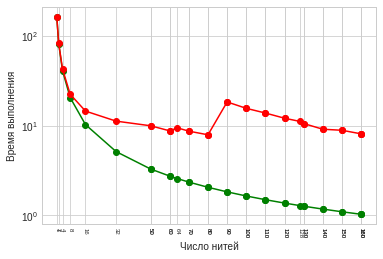

In [45]:
fig, ax = plt.subplots()
Seg_Num = max([test[1] for test in data_0])
X = np.array([test[0] for test in data_0 if test[1] == Seg_Num])
Y = np.array([test[2] for test in data_0 if test[1] == Seg_Num])
Y_lin =np.array([Y[0] * (X[0] / X[i]) for i in range(len(X))])
ax.set_yscale("log")
#ax.set_xscale("log")
print(" Линейная зависимость:", Y_lin)
print("Реальные результаты:", Y)
ax.plot(X, Y_lin, color='green', marker='o')
ax.plot(X, Y, color='red', marker='o')
ax.set_xlabel("Число нитей")
ax.set_ylabel("Время выполнения")

plt.xticks(X, X, rotation=-90, fontsize=6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


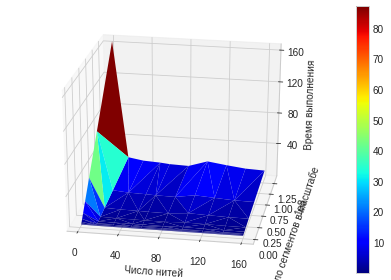

In [85]:
import sys

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy
from numpy.random import randn
from scipy import array, newaxis


DATA = array([[dt[0], dt[1], dt[2]] for dt in data_0])

Xs = DATA[:,0]
Ys = DATA[:,1]
Zs = DATA[:,2]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))
ax.set_xlabel('Число нитей')
ax.set_ylabel('Число сегментов в масштабе')
ax.set_zlabel('Время выполнения')
ax.view_init(25,-80)

fig.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


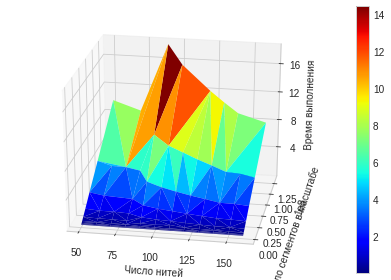

In [84]:
import sys

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy
from numpy.random import randn
from scipy import array, newaxis


DATA = array([[dt[0], dt[1], dt[2]] for dt in data_1])

Xs = DATA[:,0]
Ys = DATA[:,1]
Zs = DATA[:,2]



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.set_xlabel('Число нитей')
ax.set_ylabel('Число сегментов в масштабе')
ax.set_zlabel('Время выполнения')
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))
ax.view_init(25,-80)

fig.tight_layout()

plt.show()